### Treść zadania

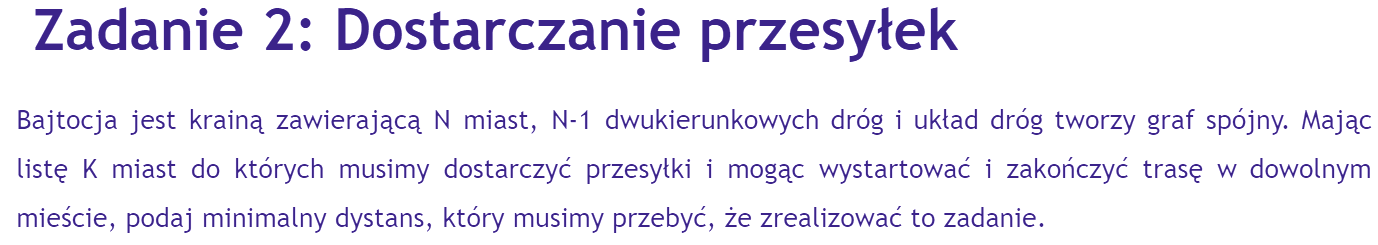

### Omówienie algorytmu

###### Krótki opis:
W skrócie, graf który ma $ n - 1 $ krawędzi i $ n $ wierzchołków, będący przy tym grafem spójnym, musi być grafem acyklicznym, a więc będzie to nieskierowany graf spójny acykliczny, czyli tzw. drzewo. Naszym celem jest przejechanie łacznie jak najmniejszej odległości, ale dojechanie do każdego z miast, oznacza również konieczność powrotu tą samą drogą, z tym wyjątkiem, że do pierwszego miasta nie wracamy z ostatniego, więc drogę od pierwszego do ostatniego przebędziemy tylko jeden raz (wynika to stąd, że graf jest acykliczny, więc nie istnieje inna możliwość dostania się do kolejnego miasta niż powrót tą samą drogą). Ponieważ również chcemy wystartować w wybranym przez nas mieście i zakończyć również w wybranym przez nas mieście (nie mamy tego narzuconego), dobierzemy miasto początkowe i końcowe tak, by odległość między nimi była największą możliwą odlełgością między parą miast, spośród tych miast, które musimy odwiedzić. Problem znalezienia największej odległości najlepiej rozwiązać, przy pomocy algorytmu, który wyznacza średnicę drzewa (patrz *Zadanie 8. (Średnica drzewa)* z poprzednich zajęć BIT Algo). Musimy go jednak zmodyfikować w taki sposób, aby nie szukał on największego dystansu w całym grafie (średnicy całego grafu), lecz pomiędzy dwoma najodleglejszymi miastami, które chcemy później odwiedzić. Finalna odległość będzie równa podwojonej liczbie krawędzi, które odwiedzimy, pomniejszonej o długość średnicy grafu.

### Złożoność

###### Obliczeniowa:
$ O(V) $
###### Pamięciowa:
$ O(V) $ - graf modyfikujemy w miejscu, ale i tak tworzymy tablice o rozmiarze $ V $ na odwiedzone wierzchołki, itp.

### Implementacja #1
#### Dla grafu nieważonego
##### Z usuwaniem gałęzi, których nie będziemy odwiedzać, jadąc do miast (mapujemy graf do takiej postaci, aby w liściach znalazły się zawsze miasta, do których chemy pojechać)

In [1]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G


def map_graph(G: 'graph represented by adjacency lists', C: 'array of cities to visit'):
    n = len(G)
    k = len(C)
    
    visits = [0] * n
    for i in range(k):
        visits[C[i]] = 2  # Mark cities which will be visited
    
    def dfs(u):
        found_to_visit = visits[u] == 2
        visits[u] = 1
        for v in G[u]:
            if visits[v] == 0 or visits[v] == 2:
                if dfs(v):
                    found_to_visit = True
        
        if not found_to_visit:
            visits[u] = -1
        
        return found_to_visit
    
    dfs(C[0])
    
    for u in range(n):
        if visits[u] == -1:
            G[u] = []
        else:
            # We must also remove edges which join cities
            # on a path with unvisited cities
            edges = []
            for v in G[u]:
                if visits[v] == 1:
                    edges.append(v)
            G[u] = edges
            
            
def diameter_helper(G, begin_u):
    n = len(G)
    visited = [False] * n
    max_u = max_dist = 0
    
    def dfs(u, dist):
        nonlocal max_u, max_dist
        if dist > max_dist:
            max_dist = dist
            max_u = u
        
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v, dist + 1)
        return dist
    
    dfs(begin_u, 0)
            
    return max_dist, max_u


def tree_diameter(G: 'graph represented by adjacency lists'):
    n = len(G)
    for u in range(n): 
        if G[u]: break
    _, u    = diameter_helper(G, u)
    diam, v = diameter_helper(G, u)
    return diam, u, v
    
            
def min_dist(G: 'graph represented by adjacency lists', C: 'array of cities to visit'):
    n = len(G)
    
    map_graph(G, C)
    
    total_dist = 0
    for u in range(n):
        total_dist += len(G[u])
        
    diam, begin_city, end_city = tree_diameter(G)
    total_dist -= diam
    
    return total_dist, begin_city, end_city

###### Kilka testów

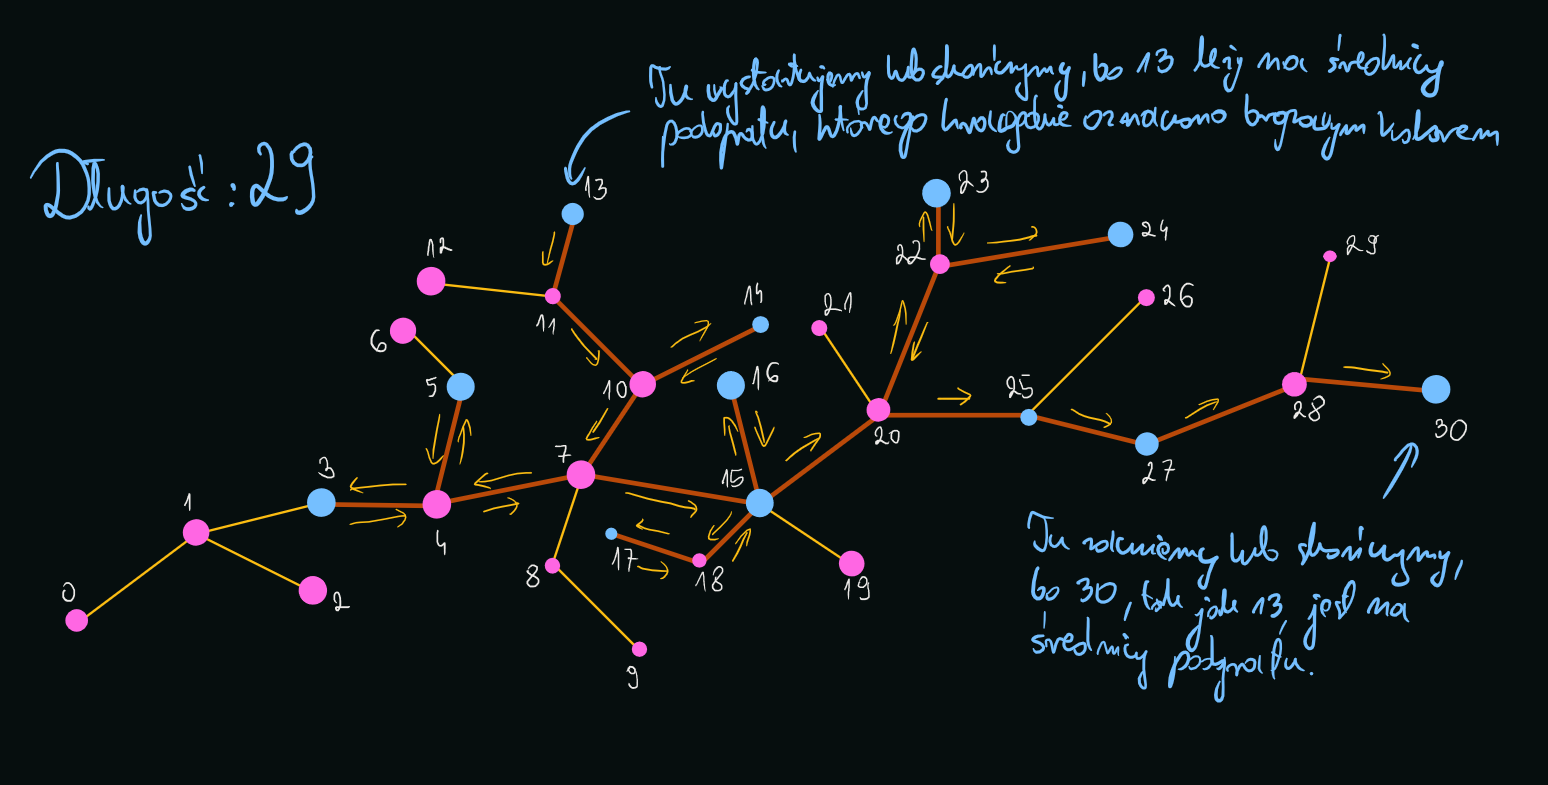

In [2]:
E = [(0, 1), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6), (4, 7), (7, 10), (10, 11), (11, 12), (11, 13), 
     (10, 14), (7, 8), (8, 9), (7, 15), (15, 16), (15, 18), (17, 18), (15, 19), (15, 20), (20, 21),
     (20, 22), (22, 23), (22, 24), (20, 25), (25, 26), (25, 27), (27, 28), (28, 29), (28, 30)]
C = [3, 5, 13, 14, 16, 15, 17, 23, 24, 25, 27, 30]

n = len(E) + 1
G = undirected_graph_list(E, n)

In [3]:
dist, begin_city, end_city = min_dist(G, C)
print('Minimum distance:', dist)
print('Start at city:', begin_city)
print('End at city:', end_city)

Minimum distance: 29
Start at city: 30
End at city: 13


In [4]:
map_graph(G, C)
sum(len(e) for e in G)  # Duplicated number of all edges

38

In [5]:
G

[[],
 [],
 [],
 [4],
 [3, 5, 7],
 [4],
 [],
 [4, 10, 15],
 [],
 [],
 [7, 11, 14],
 [10, 13],
 [],
 [11],
 [10],
 [7, 16, 18, 20],
 [15],
 [18],
 [15, 17],
 [],
 [15, 22, 25],
 [],
 [20, 23, 24],
 [22],
 [22],
 [20, 27],
 [],
 [25, 28],
 [27, 30],
 [],
 [28]]

### Implementacja #2
#### Dla grafu ważonego
##### Z usuwaniem gałęzi, których nie będziemy odwiedzać, jadąc do miast (mapujemy graf do takiej postaci, aby w liściach znalazły się zawsze miasta, do których chemy pojechać)

In [6]:
def undirected_graph_list(E: 'array of edges and their weights', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))  # <--- difference is here
        G[edge[1]].append((edge[0], edge[2]))  # <--- difference is here
    return G


def map_graph(G: 'graph represented by adjacency lists', C: 'array of cities to visit'):
    n = len(G)
    k = len(C)
    
    visits = [0] * n
    for i in range(k):
        visits[C[i]] = 2  # Mark cities which will be visited
    
    def dfs(u):
        found_to_visit = visits[u] == 2
        visits[u] = 1
        for i in range(len(G[u])):  # <--- difference is here
            v = G[u][i][0]   # <--- difference is here
            if visits[v] == 0 or visits[v] == 2:
                if dfs(v):
                    found_to_visit = True
        
        if not found_to_visit:
            visits[u] = -1
        
        return found_to_visit
    
    dfs(C[0])
    
    for u in range(n):
        if visits[u] == -1:
            G[u] = []
        else:
            edges = []
            for i in range(len(G[u])):       # <--- difference is here
                if visits[G[u][i][0]] == 1:  # <--- difference is here
                    edges.append(G[u][i])    # <--- difference is here
            G[u] = edges
            
            
def diameter_helper(G, begin_u):
    n = len(G)
    visited = [False] * n
    max_u = max_dist = 0
    
    def dfs(u, dist):
        nonlocal max_u, max_dist
        if dist > max_dist:
            max_dist = dist
            max_u = u
        
        visited[u] = True
        for v, wieght in G[u]:   # <--- difference is here
            if not visited[v]:
                dfs(v, dist + wieght)  # <--- difference is here
        return dist
    
    dfs(begin_u, 0)
            
    return max_dist, max_u


def tree_diameter(G: 'graph represented by adjacency lists'):
    n = len(G)
    # Find the first vertex which has connected edges
    for u in range(n): 
        if G[u]: break
    _, u    = diameter_helper(G, u)
    diam, v = diameter_helper(G, u)
    return diam, u, v
    
            
def min_dist(G: 'graph represented by adjacency lists', C: 'array of cities to visit'):
    n = len(G)
    
    map_graph(G, C)
    
    total_dist = 0
    for u in range(n):    
        for i in range(len(G[u])):     # <--- difference is here
            total_dist += G[u][i][1]   # <--- difference is here
        
    diam, begin_city, end_city = tree_diameter(G)
    total_dist -= diam
    
    return total_dist, begin_city, end_city

###### Kilka testów

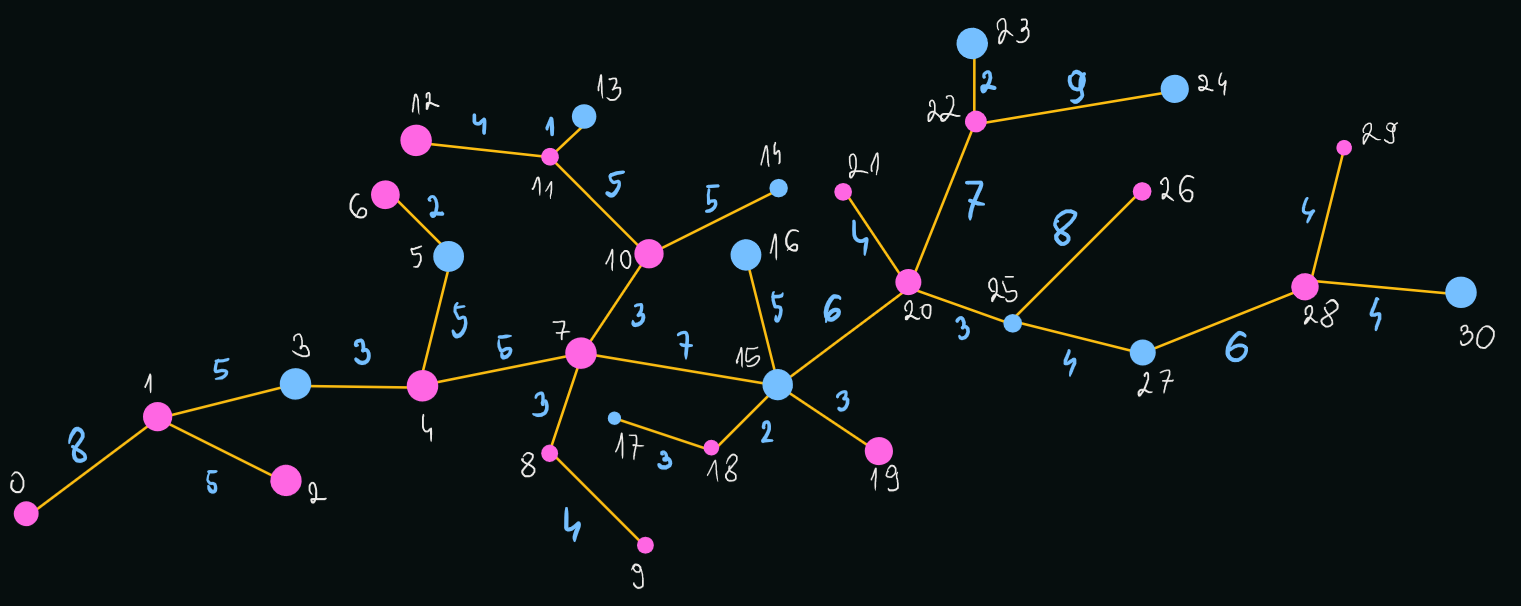

In [7]:
E = [(0, 1, 8), (1, 2, 6), (1, 3, 5), (3, 4, 3), (4, 5, 5), (5, 6, 2), (4, 7, 5), (7, 10, 3), (10, 11, 5), 
     (11, 12, 4), (11, 13, 1), (10, 14, 5), (7, 8, 3), (8, 9, 4), (7, 15, 7), (15, 16, 5), (15, 18, 2), 
     (17, 18, 3), (15, 19, 3), (15, 20, 6), (20, 21, 4), (20, 22, 7), (22, 23, 2), (22, 24, 9), 
     (20, 25, 3), (25, 26, 8), (25, 27, 4), (27, 28, 6), (28, 29, 4), (28, 30, 4)]
C = [3, 5, 13, 14, 16, 15, 17, 23, 24, 25, 27, 30]

n = len(E) + 1
G = undirected_graph_list(E, n)

In [8]:
dist, begin_city, end_city = min_dist(G, C)
print('Minimum distance:', dist)
print('Start at city:', begin_city)
print('End at city:', end_city)

Minimum distance: 130
Start at city: 30
End at city: 5


In [9]:
map_graph(G, C)
sum(len(e) for e in G)  # Duplicated number of all edges

38

In [10]:
G

[[],
 [],
 [],
 [(4, 3)],
 [(3, 3), (5, 5), (7, 5)],
 [(4, 5)],
 [],
 [(4, 5), (10, 3), (15, 7)],
 [],
 [],
 [(7, 3), (11, 5), (14, 5)],
 [(10, 5), (13, 1)],
 [],
 [(11, 1)],
 [(10, 5)],
 [(7, 7), (16, 5), (18, 2), (20, 6)],
 [(15, 5)],
 [(18, 3)],
 [(15, 2), (17, 3)],
 [],
 [(15, 6), (22, 7), (25, 3)],
 [],
 [(20, 7), (23, 2), (24, 9)],
 [(22, 2)],
 [(22, 9)],
 [(20, 3), (27, 4)],
 [],
 [(25, 4), (28, 6)],
 [(27, 6), (30, 4)],
 [],
 [(28, 4)]]